In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

In [6]:
train_path="D:/train_tomato2"
# get the training labels
import os

train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(np.array(train_labels).shape)

(3L,)


In [7]:
# empty lists to hold feature vectors and labels
import scipy
global_features = []
labels = []
bins=8
i, j = 0, 0
k = 0
img_mode=[]
for training_name in train_labels:
        # join the training data path and each species training folder
    img_list = os.listdir(train_path + '/' + training_name)
    print('TRAINING_NAME',training_name)
    current_label = training_name
    print('current_label',current_label)
    k = 1
    for img in img_list:
        image=train_path + '/' + training_name+'/' + img
        ip_img = cv2.imread(image,cv2.IMREAD_UNCHANGED)
        height,width=ip_img.shape[:2]
#         plt.figure(figsize=(26, 26))
        b,g,r = cv2.split(ip_img)       # get b,g,r
        ip_img = cv2.merge([r,g,b])     # switch it to rgb
#         plt.subplots_adjust(bottom=1.0, right=1.8, top=3.0, wspace = 0.5, hspace=0.5)
#         plt.imshow(ip_img),plt.title('ORIGINAL')
        fixed_size=(height,width)
        
        image = cv2.resize(ip_img, fixed_size) 
        [rows,cols]=ip_img.shape[0:2]
        blur = cv2.GaussianBlur(image,(11,11),1)
#         plt.subplot(661),plt.imshow(blur),plt.title('original blurred Image')
        ###HISTOGRAM EQUALIZATION####
        img_out = cv2.cvtColor(blur, cv2.COLOR_BGR2YUV)
        img_out[:,:,0]=cv2.equalizeHist(img_out[:,:,0])
        img_equi=cv2.cvtColor(img_out, cv2.COLOR_YUV2BGR)
#         plt.subplot(662),plt.imshow(img_equi),plt.title(' Equilized Image')
        img_out=cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
#         plt.subplot(661),plt.imshow(img_equi)
          ####RGB TO HSV COLOR SPACE CONVERSION###
#         plt.figure(figsize=(20, 20))    
        hsv_image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2HSV)
#         plt.subplot(663),plt.imshow(hsv_image),plt.title('HSV_IMAGE')
        # cv2.imshow('HSV_IMAGE',hsv_image)
        lower_green = np.array([36,0,0])
        upper_green = np.array([86,255,255])
        mask = cv2.inRange(hsv_image, lower_green, upper_green)

        kernel = np.ones((5,5),dtype=int)
        dilated = cv2.dilate(mask,kernel)

        res = cv2.bitwise_and(hsv_image,hsv_image, mask=mask)
        
        infected_hsv=hsv_image-res
        plt.figure(figsize=(16, 16))
#         plt.subplot(664),plt.imshow(infected_hsv),plt.title('Infected_HSV')
        bgr_image = cv2.cvtColor(infected_hsv, cv2.COLOR_HSV2BGR)
#         plt.subplot(665),plt.imshow(bgr_image),plt.title('Infected_BGR_IMAGE')
        # res_modified=image-res
        # plt.imshow(res_modified)
        img_out = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2GRAY)
#         plt.subplot(666),plt.imshow(img_out, cmap='gray'),plt.title('Gray_infected_image')
        for x in range (1,height-1):
              for y in range (1,width-1):

                pixel = img_out[x,y]
                if np.all((img_out[x,y])!=0):
                    img_mode.append(img_out[x,y])
                
                y+=1
        x+=1
            
# a=scipy.stats.skew(img_mode)
        mean_g=(np.mean(img_mode))
        std_g=(np.std(img_mode))
        variance_g=(np.var(img_mode))            
        skewness_g=scipy.stats.skew(img_mode)
        kurtosis_g=scipy.stats.kurtosis(img_mode,axis=0,fisher=False) #Pearson Kurtosis 
        mean_g=mean_g.reshape(-1,1)
        std_g=std_g.reshape(-1,1)
        variance_g=variance_g.reshape(-1,1)
        skewness_g=(np.array(skewness_g)).reshape(-1,1)
        kurtosis_g=(np.array(kurtosis_g)).reshape(-1,1)
            

        ##########Textual_features_extrcation##########
        g = greycomatrix(img_out, [2], [0], levels=256,normed=True, symmetric=True)
#         plt.subplot(667),plt.imshow(g, cmap='gray')
        contrast_g=greycoprops(g,'contrast')
        correlation_g=greycoprops(g,'correlation')
        energy_g=greycoprops(g,'energy')
                # entropy_g=greycoprops(g,'entropy')
        homogeneity_g=greycoprops(g,'homogeneity')
        dissimilarity_g=greycoprops(g,'dissimilarity')
        global_feature = np.hstack(([mean_g,std_g,variance_g,kurtosis_g,skewness_g,contrast_g,correlation_g,energy_g,homogeneity_g,dissimilarity_g]))
#         print('global_feature is',global_feature)
        labels.append(current_label)
        global_features.append(global_feature)
        
        i += 1
        k += 1
#         print('k is',k)
#         print('i is',i)
    print( "[STATUS] processed folder: {}".format(current_label))
#     print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)

    j += 1
    print('j is',j)
# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))


('TRAINING_NAME', 'Tomato_Early_blight')
('current_label', 'Tomato_Early_blight')
[STATUS] processed folder: Tomato_Early_blight
('j is', 1)
('TRAINING_NAME', 'Tomato_Healthy')
('current_label', 'Tomato_Healthy')
[STATUS] processed folder: Tomato_Healthy
('j is', 2)
('TRAINING_NAME', 'Tomato___Late_blight')
('current_label', 'Tomato___Late_blight')
[STATUS] processed folder: Tomato___Late_blight
('j is', 3)
[STATUS] training Labels (669L,)


<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [23]:
ip_img.shape[0:2]

(256, 256)

In [36]:
global_features=np.array(global_features).reshape(-1,10)
print ("[STATUS] completed Global Feature Extraction...")
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))
# encode the target labels
targetNames = np.unique(labels)
print(targetNames)

[STATUS] completed Global Feature Extraction...
[STATUS] feature vector size (669L, 10L)
[STATUS] training Labels (669L,)
['Tomato_Early_blight' 'Tomato_Healthy' 'Tomato___Late_blight']


In [37]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

('Label', LabelEncoder())
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [38]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)


In [39]:
rescaled_features

array([[0.1003032 , 0.27061202, 0.22539655, ..., 0.92634173, 0.92893479,
        0.14443026],
       [0.        , 0.        , 0.        , ..., 0.92254005, 0.93267528,
        0.08976093],
       [0.48331342, 0.66042896, 0.60905558, ..., 0.85057384, 0.84928214,
        0.22559367],
       ...,
       [0.90111396, 0.93593256, 0.92219646, ..., 0.79495812, 0.81426095,
        0.28606174],
       [0.90030449, 0.93571324, 0.92193335, ..., 0.93418392, 0.93973802,
        0.10263719],
       [0.90455165, 0.9382181 , 0.92493968, ..., 0.40113555, 0.42008603,
        0.58756152]])

In [40]:
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [41]:
# save the feature vector using HDF5
import h5py
h5f_data = h5py.File('d:/new_output/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(global_features))

h5f_label = h5py.File('d:/new_output/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()
print ("[STATUS] end of training..")

[STATUS] end of training..


In [42]:
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

In [43]:
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('D:/new_output/data.h5', 'r')
h5f_label = h5py.File('D:/new_output/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")

[STATUS] features shape: (669L, 10L)
[STATUS] labels shape: (669L,)
[STATUS] training started...


In [44]:
global_feature

array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 7.84848025e+02, 9.44632507e-01, 6.18718201e-01,
        6.77413118e-01, 9.02171506e+00]])

In [45]:

8.3e+01

83.0

In [46]:
# train_test_split size
test_size = 0.20
# seed for reproducing same results
# seed = 9
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=None)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))
print(testLabelsGlobal.size)
print(trainDataGlobal.size)

[STATUS] splitted train and test data...
Train data  : (535L, 10L)
Test data   : (134L, 10L)
Train labels: (535L,)
Test labels : (134L,)
134
5350


In [47]:
testLabelsGlobal

array([0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0,
       0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       2, 1], dtype=int64)

In [48]:
16e+2

1600.0

('predictions', array([0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0,
       0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 1], dtype=int64))
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.92      0.97      0.94        34
           2       0.96      0.98      0.97        46

   micro avg       0.96      0.96      0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134

('TEST LABELS', array([0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2,

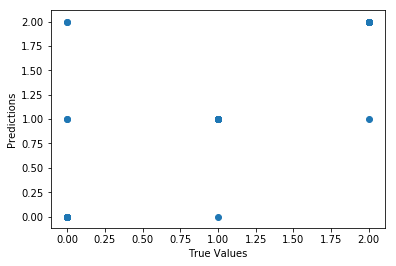

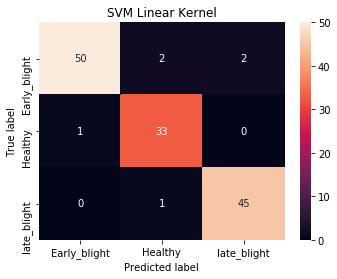

In [49]:
import pandas as pd
import seaborn as sns
clf = RandomForestClassifier(n_estimators=100, random_state=9)

# anova_svm = make_pipeline(anova_filter, clf)
model=clf.fit(trainDataGlobal, trainLabelsGlobal)
y_pred = model.predict(testDataGlobal)
print("predictions",y_pred)
print(classification_report(testLabelsGlobal, y_pred))
print("TEST LABELS",testLabelsGlobal)
plt.scatter(testLabelsGlobal, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print ("Score", model.score(testDataGlobal, testLabelsGlobal))
cm=confusion_matrix(testLabelsGlobal,y_pred)
plt.figure(figsize=(5.5,4))
cm_df = pd.DataFrame(cm,
                     index = ['Early_blight','Healthy','late_blight'], 
                     columns = ['Early_blight','Healthy','late_blight'])
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

LR: 0.728925 (0.030914)
LDA: 0.962589 (0.014058)
KNN: 0.704706 (0.012413)
CART: 0.859791 (0.009470)
RF: 0.900906 (0.017503)
NB: 0.667263 (0.018974)
SVM: 0.373779 (0.020121)


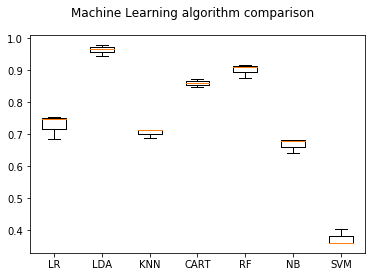

In [50]:
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=3, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [28]:

results

[]

In [51]:
import matplotlib.pyplot as plt
# create the classifier
print ('[STATUS] Creating the classifier..')
clf_rf =RandomForestClassifier(n_estimators=100, random_state=9)
# fit the training data and labels
print ('[STATUS] Fitting data/label to model..')
clf_rf.fit(trainDataGlobal, trainLabelsGlobal)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[STATUS] Creating the classifier..
[STATUS] Fitting data/label to model..


('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]])])
('PREDICTION RESULT', 2)
[STATUS] PREDICTION ARRAY(1L,)


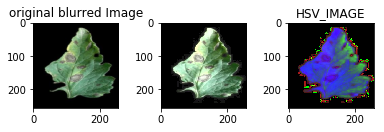

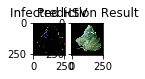

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]])])
('PREDICTION RESULT', 2)
[STATUS] PREDICTION ARRAY(2L,)


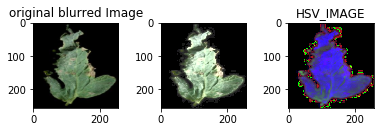

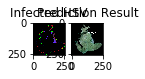

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]])])
('PREDICTION RESULT', 2)
[STATUS] PREDICTION ARRAY(3L,)


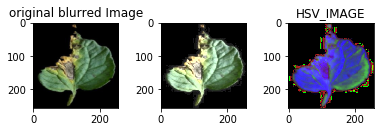

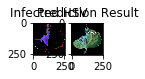

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]])])
('PREDICTION RESULT', 2)
[STATUS] PREDICTION ARRAY(4L,)


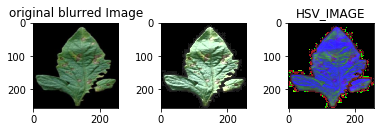

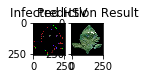

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]])])
('PREDICTION RESULT', 2)
[STATUS] PREDICT

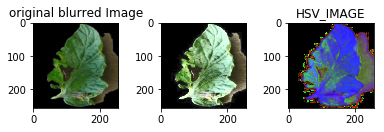

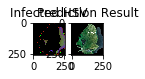

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

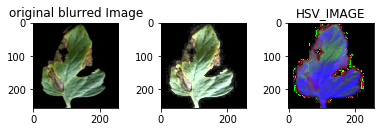

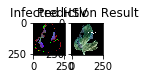

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

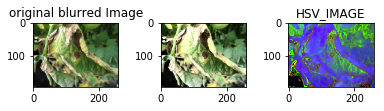

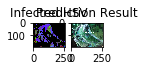

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

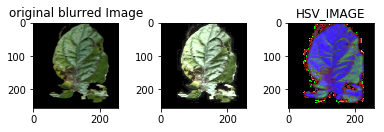

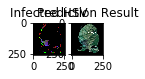

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

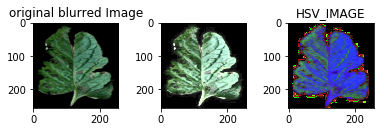

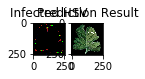

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

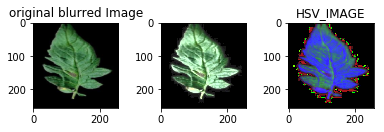

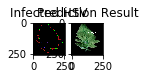

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

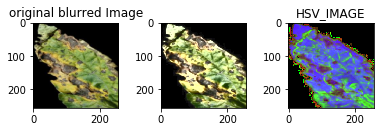

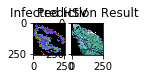

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

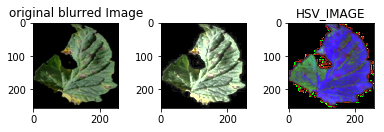

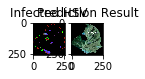

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

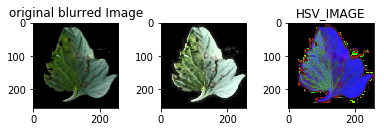

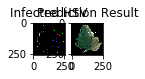

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

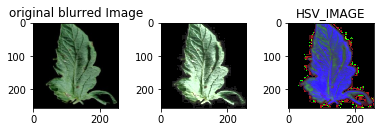

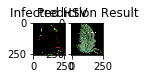

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

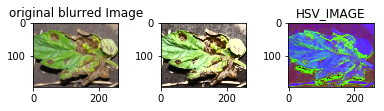

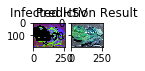

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

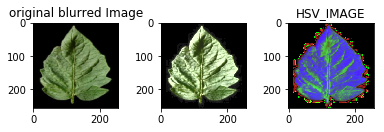

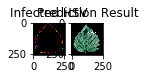

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

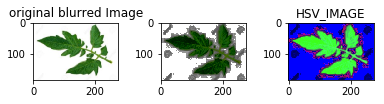

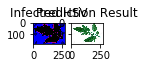

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

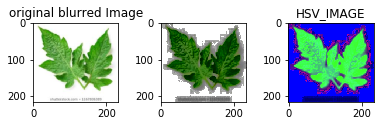

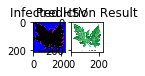

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

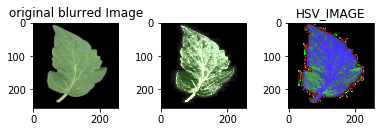

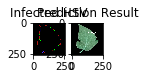

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

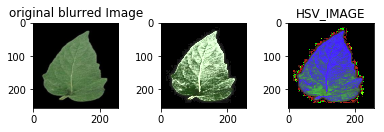

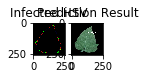

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

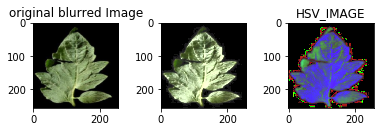

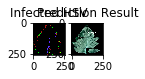

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

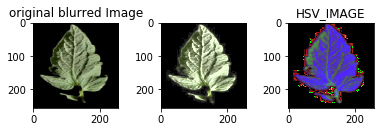

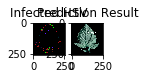

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

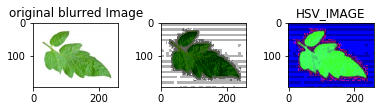

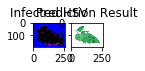

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

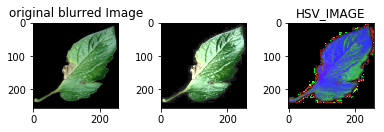

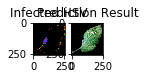

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

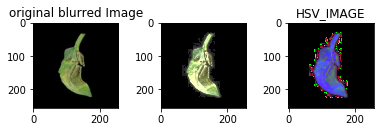

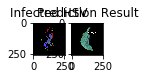

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

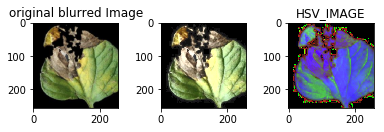

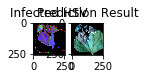

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

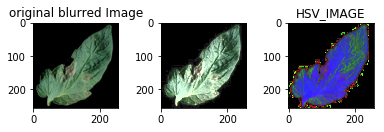

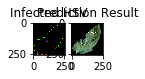

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

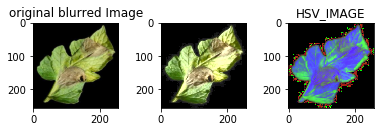

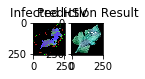

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

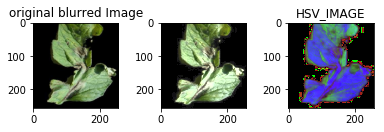

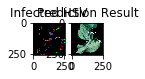

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

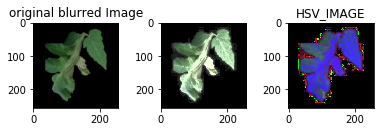

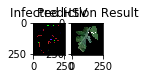

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

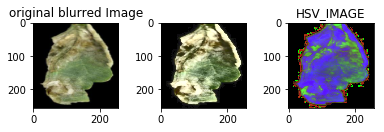

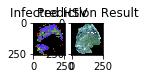

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

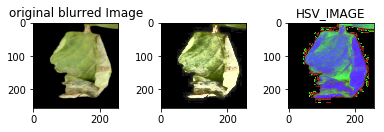

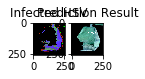

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

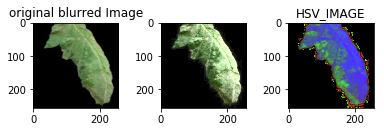

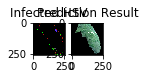

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

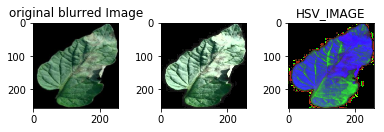

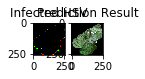

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

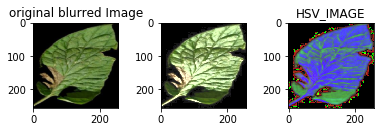

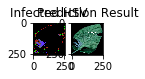

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

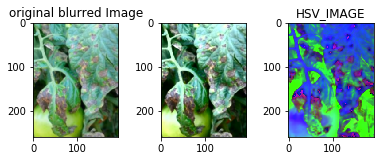

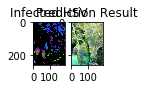

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

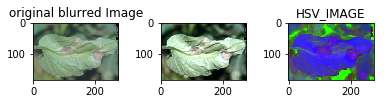

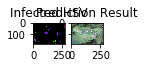

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

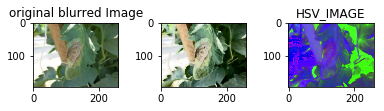

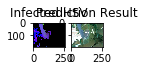

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

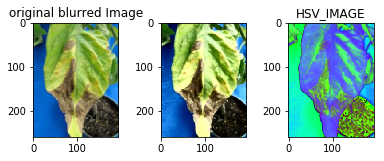

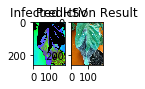

('Global Features\n', [array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.84883489e+02, 6.20535980e-01, 9.32219994e-01,
        9.50478785e-01, 2.01522515e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.91885273e+02, 8.03659781e-01, 8.98831786e-01,
        9.22829942e-01, 2.90994094e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 4.40264195e+02, 9.13039771e-01, 8.45149561e-01,
        8.71249749e-01, 4.42115219e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 2.14491757e+02, 6.88289957e-01, 9.10830591e-01,
        9.36031560e-01, 2.17633489e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.56319579e+03, 1.96192021e+00,
        6.62790448e-01, 1.68925766e+02, 9.14081958e-01, 8.07742280e-01,
        8.40546699e-01, 2.89931410e+00]]), array([[9.63412893e+01, 8.10135531e+01, 6.

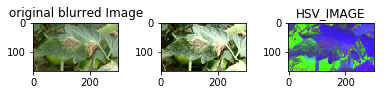

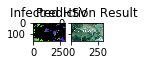

In [57]:
test_path="D:\\test_tomato1"
labels = []
test_labels = os.listdir(test_path)
prediction_array=[]
global_features=[]
# print(test_labels)
i, j = 0, 0
k = 0

for file in glob.glob(test_path + "/*.jpg"):

        ip_img = cv2.imread(file)
        b,g,r = cv2.split(ip_img)       # get b,g,r
        ip_img = cv2.merge([r,g,b])     # switch it to rgb
        plt.subplots_adjust(bottom=1.0, right=1.8, top=3.0, wspace = 0.5, hspace=0.5)
#         plt.imshow(ip_img),plt.title('ORIGINAL')
#         fixed_size=(256,256)
#         image = cv2.resize(ip_img, fixed_size)       
        blur = cv2.GaussianBlur(ip_img,(11,11),1)
        plt.subplot(161),plt.imshow(blur),plt.title('original blurred Image')
        ###HISTOGRAM EQUALIZATION####
        img_out = cv2.cvtColor(blur, cv2.COLOR_BGR2YUV)
        img_out[:,:,0]=cv2.equalizeHist(img_out[:,:,0])
        img_equi=cv2.cvtColor(img_out, cv2.COLOR_YUV2BGR)
        plt.subplot(662),plt.imshow(img_equi),plt.title(' Equilized Image')
      
        cv2.imshow('EQUALIZED RGB IMAGE',img_equi)
        cv2.imshow('Input Image',ip_img)
        img_out=cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
        plt.subplot(162),plt.imshow(img_equi)
          ####RGB TO HSV COLOR SPACE CONVERSION###
#         plt.figure(figsize=(20, 20))    
        hsv_image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2HSV)
        plt.subplot(163),plt.imshow(hsv_image),plt.title('HSV_IMAGE')
        lower_green = np.array([36,0,0])
        upper_green = np.array([86,255,255])
        mask = cv2.inRange(hsv_image, lower_green, upper_green)

        kernel = np.ones((5,5),dtype=int)
        dilated = cv2.dilate(mask,kernel)

        res = cv2.bitwise_and(hsv_image,hsv_image, mask=mask)
        dilated = cv2.dilate(mask,kernel)
        infected_hsv=hsv_image-res
        plt.figure(figsize=(4, 4))
        plt.subplot(164),plt.imshow(infected_hsv),plt.title('Infected HSV')
        bgr_image = cv2.cvtColor(infected_hsv, cv2.COLOR_HSV2BGR)
#         plt.subplot(662),plt.imshow(bgr_image),plt.title('BGR_IMAGE')
        # res_modified=image-res
        # plt.imshow(res_modified)
        img_out = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2GRAY)
#         plt.subplot(345),plt.imshow(img_out, cmap='gray')


        ##########Textual_features_extrcation##########
        g = greycomatrix(img_out, [2], [0], levels=256,normed=True, symmetric=True)
        contrast_g=greycoprops(g,'contrast')
        correlation_g=greycoprops(g,'correlation')
        energy_g=greycoprops(g,'energy')
                # entropy_g=greycoprops(g,'entropy')
        homogeneity_g=greycoprops(g,'homogeneity')
        dissimilarity_g=greycoprops(g,'dissimilarity')
        global_feature = np.hstack(([mean_g,std_g,variance_g,kurtosis_g,skewness_g,contrast_g,correlation_g,energy_g,homogeneity_g,dissimilarity_g]))

        global_features.append(global_feature)
        print('Global Features\n',global_features)
        prediction = clf_rf.predict(global_feature.reshape(1,-1))[0]
        print('PREDICTION RESULT',prediction)
        prediction_array.append(prediction)
        print("[STATUS] PREDICTION ARRAY{}".format(np.array(prediction_array).shape))
        cv2.putText(ip_img, train_labels[prediction], (30,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

        plt.subplot(165),plt.imshow(cv2.cvtColor(ip_img, cv2.COLOR_BGR2RGB)),plt.title('Prediction Result')
        plt.show()



In [33]:
np.array(prediction_array).reshape(1,-1)

array([], shape=(1, 0), dtype=float64)

In [48]:
train_labels

['Tomato_Early_blight', 'Tomato_Healthy']

In [39]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# # encode the target labels
# targetNames = np.unique(labels)
# print(labels)
le = LabelEncoder()
print('Label',le)
target = le.fit_transform(labels)
print(target.shape)
print ("[STATUS] training labels encoded...",np.array(labels).shape)

# normalize the feature vector in the range (0-1)
matrix=confusion_matrix(target,prediction_array)
print(matrix)
report=classification_report(target,prediction_array)
print(report)
import seaborn as sns
import glob
import cv2
from matplotlib import pyplot

# score=clf.score(target,prediction_array)
plt.figure(figsize=(9,9))
sns.heatmap(matrix,annot=True,fmt=".3f",linewidth=0.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('CONFUSION MATRIX')

Label LabelEncoder()
(0,)
[STATUS] training labels encoded... (0,)


ValueError: Found input variables with inconsistent numbers of samples: [0, 22]

In [22]:
###HISTOGRAM EQUALIZATION####
img_out = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
img_out[:,:,0]=cv2.equalizeHist(img_out[:,:,0])
img_equi=cv2.cvtColor(img_out, cv2.COLOR_YUV2BGR)
# cv2.imshow('EQUALIZED RGB IMAGE',img_equi)
# cv2.imshow('Input Image',ip_img)
# img_out=cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
# plt.imshow(img_out)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d4f3d52ef0>,
 Text(0.5,1,'HSV_IMAGE'))

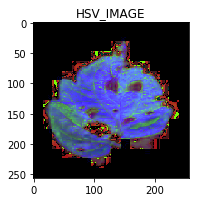

In [28]:
  ####RGB TO HSV COLOR SPACE CONVERSION###
plt.figure(figsize=(20, 20))    
hsv_image = cv2.cvtColor(img_equi, cv2.COLOR_BGR2HSV)
plt.subplot(662),plt.imshow(hsv_image),plt.title('HSV_IMAGE')
# cv2.imshow('HSV_IMAGE',hsv_image)

In [29]:
lower_green = np.array([36,0,0])
upper_green = np.array([86,255,255])

In [30]:
mask = cv2.inRange(hsv_image, lower_green, upper_green)

kernel = np.ones((5,5),dtype=int)
dilated = cv2.dilate(mask,kernel)

res = cv2.bitwise_and(hsv_image,hsv_image, mask=mask)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d4f3dcfdd8>,
 Text(0.5,1,'BGR_IMAGE'))

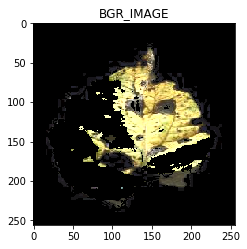

In [31]:
infected_hsv=hsv_image-res
plt.figure(figsize=(26, 26))
plt.imshow(infected_hsv)
bgr_image = cv2.cvtColor(infected_hsv, cv2.COLOR_HSV2BGR)
plt.subplot(662),plt.imshow(bgr_image),plt.title('BGR_IMAGE')
# res_modified=image-res
# plt.imshow(res_modified)

In [ ]:
       img_out = cv2.cvtColor(bgr_image, cv2.COLOR_RGB2GRAY)
        # plt.subplot(345),plt.imshow(img_out, cmap='gray')


        ##########Textual_features_extrcation##########
        g = greycomatrix(img_out, [2], [0], levels=256,normed=True, symmetric=True)
        contrast_g=greycoprops(g,'contrast')
        correlation_g=greycoprops(g,'correlation')
        energy_g=greycoprops(g,'energy')
                # entropy_g=greycoprops(g,'entropy')
        homogeneity_g=greycoprops(g,'homogeneity')
        dissimilarity_g=greycoprops(g,'dissimilarity')
        global_feature = np.hstack([contrast_g, correlation_g, energy_g, homogeneity_g,dissimilarity_g])
        labels.append(current_label)
        global_features.append(global_feature)
        
        i += 1
        k += 1
#         print('k is',k)
#         print('i is',i)
    print( "[STATUS] processed folder: {}".format(current_label))
    print('GLOBAL FEATURE SHAPE',np.array(global_features).shape)

    j += 1
    print('j is',j)
# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

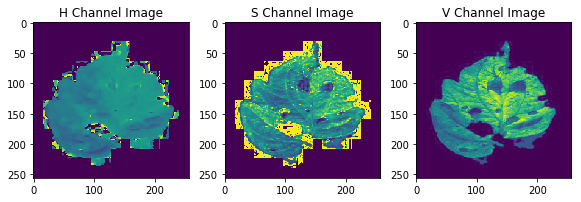

In [27]:
###Splitting HSV Color Model####
plt.figure(figsize=(20, 20))    
h_channel,s_channel,v_channel = cv2.split(hsv_image)        
plt.subplot(663),plt.imshow(h_channel),plt.title('H Channel Image')
plt.subplot(664),plt.imshow(s_channel),plt.title('S Channel Image')
plt.subplot(665),plt.imshow(v_channel),plt.title('V Channel Image')
cv2.imshow('H PART',h_channel)
cv2.imshow('S PART',s_channel)
cv2.imshow('V PART',v_channel)

In [33]:
hsv_image

array([[[135,   6, 255],
        [144,   5, 255],
        [125,  11, 255],
        ...,
        [138,  18, 235],
        [138,  18, 235],
        [139,  15, 239]],

       [[128,   8, 255],
        [131,  16, 255],
        [128,  12, 255],
        ...,
        [138,  18, 241],
        [139,  14, 247],
        [139,  14, 247]],

       [[136,  13, 255],
        [134,  13, 255],
        [131,  16, 255],
        ...,
        [138,  21, 240],
        [143,  13, 237],
        [135,  14, 250]],

       ...,

       [[139,  40,  89],
        [135,  30, 118],
        [131,  51, 105],
        ...,
        [135,  28, 127],
        [133,  74,  55],
        [135,  25, 143]],

       [[131,  29, 142],
        [131,  62,  86],
        [134,  82,  65],
        ...,
        [139,  26, 135],
        [139,  47,  76],
        [133,  34, 120]],

       [[131,  34, 120],
        [131,  38, 106],
        [128,  38, 101],
        ...,
        [139,  40,  89],
        [139,  36,  99],
        [136,  24, 116]]

In [14]:
######k means of LAB COLOR CHANNEL#####
vectorized=hsv_image.reshape(-1,3)
vectorized=np.float32(vectorized)
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)
k=10
res1,label,center=cv2.kmeans(vectorized,k,None,
criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
c=(label.flatten())
res2 = center[c.astype(int)]
res3= res2.reshape((hsv_image.shape))

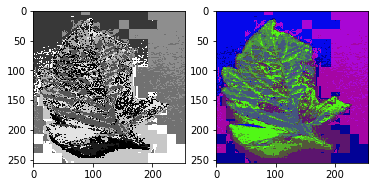

In [15]:
reshape_label=label.reshape(fixed_size)
plt.subplot(121),plt.imshow(reshape_label,cmap='gray')
plt.subplot(122),plt.imshow(res3)
cv2.imshow('HSV CLUSTERED IMAGE',res3)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fc8ec522b0>,
 <matplotlib.image.AxesImage at 0x1fc8f8d32b0>)

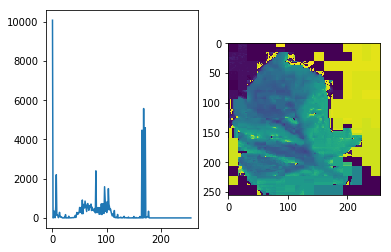

In [105]:
hue = hsv_image[:, :, 0]

#select maximum value of H component from histogram
hist = cv2.calcHist([hue],[0],None,[256],[0,256])
plt.subplot(121),plt.plot(hist)
plt.subplot(122),plt.imshow(hsv_image[:,:,0])

(<matplotlib.image.AxesImage at 0x1fc8f8934e0>,
 Text(0.5,1,'HUE CLUSTERED IMAGE'))

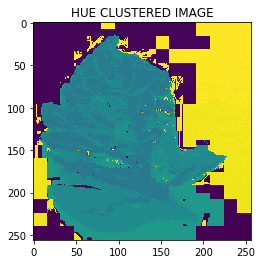

In [20]:
cv2.imshow('HUE Clustered image',res3[:,:,0])
plt.imshow(res3[:,:,0]),plt.title('HUE CLUSTERED IMAGE')

(<matplotlib.axes._subplots.AxesSubplot at 0x1fc8f92b0b8>,
 <matplotlib.image.AxesImage at 0x1fc8f53d9e8>)

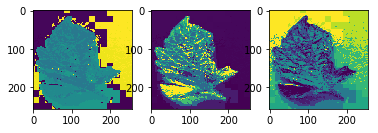

In [152]:
plt.subplot(131),plt.imshow(res3[:,:,0])
plt.subplot(132),plt.imshow(res3[:,:,1])
plt.subplot(133),plt.imshow(res3[:,:,2])

In [77]:
sum=0
flag=0

for i in range(255):
        for j in range(255):
            if reshape_label[i,j]==1:
            
              sum=sum+h_channel[i,j]
            flag+=1
           
        else:
             continue
mean2=sum/flag
mean.append(mean2)
print('MEAN IS',mean)

MEAN IS [7.832218377547098, 5.500176855055748]


In [87]:
sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
sum6=0
sum7=0
sum8=0
sum9=0
sum10=0
f1=0
f2=0
f3=0
f4=0
f5=0
f6=0
f7=0
f8=0
f9=0
f10=0

for i in range(255):
    for j in range(255):
        a=reshape_label[i,j]
        if a==0:
            sum1=sum1+h_channel[i,j]
            f1+=1
        elif a==1:
            sum2=sum2+h_channel[i,j]
            f2=f2+1
        elif a==2:
            sum3=sum3+h_channel[i,j]
            f3=f3+1
        elif a==3:
            sum4=sum4+h_channel[i,j]
            f4=f4+1
        elif a==4:
            sum5=sum5+h_channel[i,j]
            f5=f5+1
        elif a==5:
            sum6=sum6+h_channel[i,j]
            f6=f6+1
        elif a==6:
            sum7=sum7+h_channel[i,j]
            f7=f7+1
        elif a==7:
            sum8=sum8+h_channel[i,j]
            f8=f8+1
        elif a==8:
            sum9=sum9+h_channel[i,j]
            f9=f9+1
        elif a==9:
            sum10=sum10+h_channel[i,j]
            f10=f10+1
mean1=sum1/f1
mean2=sum2/f2
mean3=sum3/f3
mean4=sum4/f4
mean5=sum5/f5
mean6=sum6/f6
mean7=sum7/f7
mean8=sum8/f8
mean9=sum9/f9
mean10=sum10/f10


In [91]:
# list of integers
mean = [mean1, mean2, mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10]

In [92]:
mean

[83.19013394315583,
 83.00046414481318,
 5.46518473406415,
 69.74520185307743,
 165.574973876698,
 169.07590346379894,
 71.28155680224404,
 92.86380624906563,
 81.20933625091175,
 2.9976133651551313]

In [95]:
# empty dictionary
mean = {}
mean = {1: mean1, 2: mean2, 3:mean3,4:mean4,5:mean5, 6:mean6, 7:mean7, 8:mean8, 9:mean9, 10:mean10}


In [102]:
import operator
sorted_d = sorted(mean.items(), key=operator.itemgetter(1))
print('Dictionary in ascending order by value : ',sorted_d)

Dictionary in ascending order by value :  [(10, 2.9976133651551313), (3, 5.46518473406415), (4, 69.74520185307743), (7, 71.28155680224404), (9, 81.20933625091175), (2, 83.00046414481318), (1, 83.19013394315583), (8, 92.86380624906563), (5, 165.574973876698), (6, 169.07590346379894)]


In [108]:
label==9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

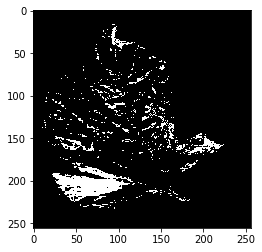

In [112]:
###Accessing cluster 0#####
label_zero=(label==8)
Dim=label_zero.reshape((reshape_label.shape))
plt.imshow(Dim,cmap='gray')

In [161]:
GREEN_RANGE_MIN_HSV = (100, 80, 70)
GREEN_RANGE_MAX_HSV = (185, 255, 255)
width, height = ip_img.shape[0],ip_img.shape[1]
for x in range(width):
    for y in range(height):
        
        h= ip[x, y ,0]
        s= hsv_image[x,y,1]
        v= hsv_image [x,y,2]
            h_ratio, s_ratio, v_ratio = rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)
            h, s, v = (h_ratio * 360, s_ratio * 255, v_ratio * 255)
#         print('h,s,v',h,s,v)
        min_h, min_s, min_v = GREEN_RANGE_MIN_HSV
        max_h, max_s, max_v = GREEN_RANGE_MAX_HSV
        if (min_h <= h <= max_h and min_s <= s <= max_s and min_v <= v <= max_v ):
            print(x,y)
            hsv_image[x,y]=0


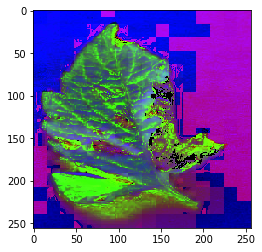

In [160]:
cv2.imshow('result masking',res3)
plt.imshow(hsv_image)

In [132]:
center

array([[ 83,  86,  59],
       [ 83, 175,  39],
       [  5,   8, 235],
       [ 69,  86, 127],
       [165,   5, 164],
       [169,   7, 213],
       [ 71, 138,  78],
       [ 92,  21, 110],
       [ 81, 248,  22],
       [  2,   2, 150]], dtype=uint8)